<a href="https://colab.research.google.com/github/aznaz43/IBM-Granite---Using-Python/blob/main/Pemanfaatan%20IBM-Granite%20dalam%20Analisis%20Restoran%20Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**“Pemanfaatan IBM Granite untuk Analisis Review Restaurant dan Strategi Peningkatan Layanan”**

**Data Classification using IBM Granite**



In [ ]:
!pip install langchain_community
!pip install replicate

**Dataset yang digunakan adalah ulasan tekstual dari pelanggan yang diperoleh melalu kaggle. Setiap baris mewakili opini atau umpan balik pelanggan tertentu tentang pengalaman mereka di restoran. Ulasan dapat mencakup komentar positif atau negatif tentang berbagai aspek seperti makanan, layanan, harga, kebersihan, dll.**

Dataset: https://www.kaggle.com/datasets/moazeldsokyx/restaurant-reviews

In [4]:
import pandas as pd
from google.colab import files
data=files.upload()

Saving Restaurant Reviews.csv to Restaurant Reviews.csv


In [5]:
data = pd.read_csv('Restaurant Reviews.csv')
data

,Review,Liked
0,Wow... Loved this place.,1.0
1,Crust is not good.,0.0
2,Not tasty and the texture was just nasty.,0.0
3,Stopped by during the late May bank holiday of...,1.0
4,The selection on the menu was great and so wer...,1.0
...,...,...
2215,The staff was untrained and unfamiliar with th...,NaN
2216,The portions were skimpy and left us hungry. 0,NaN
2217,The restaurant had unclean restrooms and unple...,NaN
2218,The waiters were slow and forgetful with our o...,NaN


**Data yang digunakan untuk melakukan analisis adalah Dataset pada kolom Review**

In [72]:
#Menentukan apakah terdapat data kosong
print(data['Review'].isna().sum())

# -- Jika tidak ada data kosong dilanjutkan ke tahap berikutnya

0


In [6]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata

# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
  model=model,
  replicate_api_token=api_token,
)



**Melakukan Klasifikasi Data Berdasarkan Review Positif, Negatif, Atau Mix  dengan IBM Granite menggunakan 25 Sampel**

In [74]:
# Refine the prompt to include reviews
reviews_text = "\n".join([f"Review {i+1}: {review}" for i, review in enumerate(data.head(25)['Review'])])
prompt1 = f"""
  clasify these review by positive, negative, or mixed and give the keyword
  {reviews_text}
"""

# Invoke the model with example prompt
response1 = output.invoke(prompt1)

# Print the response
print("Granite Model Response:\n")
print(response1)

Granite Model Response:

1. Positive - Keyword: Loved
2. Negative - Keyword: Crust
3. Negative - Keywords: Not tasty, nasty texture
4. Positive - Keyword: Loved, Rick Steve recommendation
5. Positive - Keywords: Great selection, good prices
6. Negative - Keyword: Angry, want my damn pho
7. Negative - Keyword: Not fresh
8. Negative - Keywords: Potatoes like rubber, pre-made
9. Positive - Keyword: Great fries
10. Positive - Keyword: Great touch
11. Positive - Keyword: Prompt service
12. Negative - Keyword: Would not go back
13. Negative - Keywords: No care, overpriced
14. Positive - Keyword: Tried, Cape Cod ravoli, chicken, with cranberry, mmmm!
15. Negative - Keyword: Disgusted, human hair
16. Negative - Keyword: No signs indicate cash only
17. Positive - Keyword: Highly recommended
18. Negative - Keyword: Slow service
19. Negative - Keyword: Not worth time or Vegas
20. Negative - Keyword: Did not like at all
21. Negative - Keyword: Blah! (referring to Burritos)
22. Positive - Keyword: 

In [39]:
prompt2=f"""
  clasify these review by positive, negative, or mixed only without explanation make a table
 {reviews_text}
"""

# Invoke the model with example prompt
response2 = output.invoke(prompt2)

# Print the response
print("Granite Model Response:\n")
print(response2)


Granite Model Response:

| Review Number | Sentiment |
|------------|-----------|
| 1          | Positive  |
| 2          | Negative  |
| 3          | Negative  |
| 4          | Positive  |
| 5          | Positive  |
| 6          | Negative  |
| 7          | Negative  |
| 8          | Negative  |
| 9          | Positive  |
| 10         | Positive  |
| 11         | Positive  |
| 12         | Negative  |
| 13         | Negative  |
| 14         | Positive  |
| 15         | Negative  |
| 16         | Negative  |
| 17         | Positive  |
| 18         | Mixed     |
| 19         | Negative  |
| 20         | Negative  |
| 21         | Negative  |
| 22         | Positive  |
| 23         | Positive  |
| 24         | Mixed     |
| 25         | Mixed     |


Mengubah output Menjadi Sebuah Tabel

In [41]:
import pandas as pd
import io

# Convert the markdown table string to a pandas DataFrame
# Use io.StringIO to treat the string as a file
# Use the first two rows as header and separator, then read the data
tabel_response = pd.read_csv(io.StringIO(response2), sep='|', skiprows=[1]).dropna(axis=1, how='all')

# Clean up column names (remove leading/trailing whitespace)
tabel_response.columns = tabel_response.columns.str.strip()

# Remove the first row which is the header repeated
tabel_response = tabel_response.iloc[0:]

# Rename the columns
tabel_response = tabel_response.rename(columns={'Review Number': 'Review', 'Sentiment': 'Sentiment'})

# Display the resulting DataFrame
display(tabel_response)

,Review,Sentiment
0,1,Positive
1,2,Negative
2,3,Negative
3,4,Positive
4,5,Positive
5,6,Negative
6,7,Negative
7,8,Negative
8,9,Positive
9,10,Positive


Menentukan jumlah review berdasarkan kategori positif, negatif, dan mix


In [42]:
 grup_review = tabel_response['Sentiment'].value_counts()
 grup_review


,count
Sentiment,
Negative,12
Positive,10
Mixed,3


<Figure size 640x480 with 0 Axes>

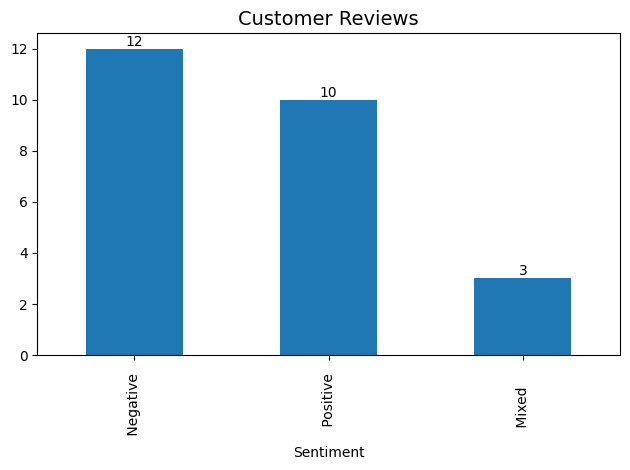

In [43]:
import matplotlib.pyplot as plt
plt.clf()

# hitung frekuensi dari masing-masing nilai pada kolom 'Produk'
bar_review = tabel_response['Sentiment'].value_counts()


plt.figure()
# membuat bar plot dengan method `plot.bar()` dari pandas
ax_review=bar_review.plot.bar()
plt.bar_label(ax_review.containers[0], fontsize=10, color='black')
plt.title('Customer Reviews', size=14)
plt.tight_layout()
plt.show()


Klasifikasi Review Pelanggan berdasarkan kategori service (pelayanan), food(makanan), dan price(harga)

**Melakukan Klasifikasi Data Berdasarkan Kategori Service, Food, Price dengan IBM Granite menggunakan 25 Sampel**

In [68]:
# Refine the prompt to include reviews
reviews_text1 = "\n".join([f"Review {i+1}: {review}" for i, review in enumerate(data.head(25)['Review'])])
prompt = f"""
  clasify these review by service, food, price without explanation and make a table
  {reviews_text1}
"""

# Invoke the model with example prompt
response1 = output.invoke(prompt)

# Print the response
print("Granite Model Response:\n")
print(response1)

Granite Model Response:

| Review # | Service | Food | Price |
|------------|--------------|-------|-------|
| 1          | -            | +     | -     |
| 2          | -            | -     | -     |
| 3          | -            | -     | -     |
| 4          | -            | +     | -     |
| 5          | -            | -     | +     |
| 6          | -            | -     | -     |
| 7          | -            | -     | -     |
| 8          | -            | -     | -     |
| 9          | -            | +     | -     |
| 10         | -            | -     | -     |
| 11         | +            | -     | -     |
| 12         | -            | -     | -     |
| 13         | -            | -     | -     |
| 14         | -            | +     | -     |
| 15         | -            | -     | -     |
| 16         | -            | -     | -     |
| 17         | -            | +     | -     |
| 18         | -            | -     | -     |
| 19         | -            | -     | -     |
| 20         | - 

Mengubah Output Menjadi sebuah Tabel

In [69]:
import pandas as pd
import io

# Convert the markdown table string to a pandas DataFrame
# Use io.StringIO to treat the string as a file
# Use the first two rows as header and separator, then read the data
tabel_kategori = pd.read_csv(io.StringIO(response1), sep='|', skiprows=[1]).dropna(axis=1, how='all')

# Clean up column names (remove leading/trailing whitespace)
tabel_kategori.columns = tabel_kategori.columns.str.strip()

# Remove the first row which is the header repeated
tabel_kategori = tabel_kategori.iloc[0:]

# Rename the columns


# Display the resulting DataFrame
display(tabel_kategori)

,Unnamed: 0,Review #,Service,Food,Price
0,NaN,1.0,-,+,-
1,NaN,2.0,-,-,-
2,NaN,3.0,-,-,-
3,NaN,4.0,-,+,-
4,NaN,5.0,-,-,+
5,NaN,6.0,-,-,-
6,NaN,7.0,-,-,-
7,NaN,8.0,-,-,-
8,NaN,9.0,-,+,-
9,NaN,10.0,-,-,-


Tahap Pembersihan Tabel

In [70]:
data_kategori = tabel_kategori.drop(index=[25,26,27,28])
data_kategori
kolom_hapus = data_kategori.columns[0]
data_kategori1 = data_kategori.drop(kolom_hapus, axis=1)
data_kategori1


,Review #,Service,Food,Price
0,1.0,-,+,-
1,2.0,-,-,-
2,3.0,-,-,-
3,4.0,-,+,-
4,5.0,-,-,+
5,6.0,-,-,-
6,7.0,-,-,-
7,8.0,-,-,-
8,9.0,-,+,-
9,10.0,-,-,-


Menentukan Jumlah Review Berdasarkan Kategori

In [71]:
service =data_kategori1['Service'].value_counts()
food=data_kategori1['Food'].value_counts()
price=data_kategori1['Price'].value_counts()
print(service)
print(food)
print(price)

Service
-                22
+                 3
Name: count, dtype: int64
Food
-         19
+          6
Name: count, dtype: int64
Price
-         24
+          1
Name: count, dtype: int64


Visualisasi Data

<Figure size 640x480 with 0 Axes>

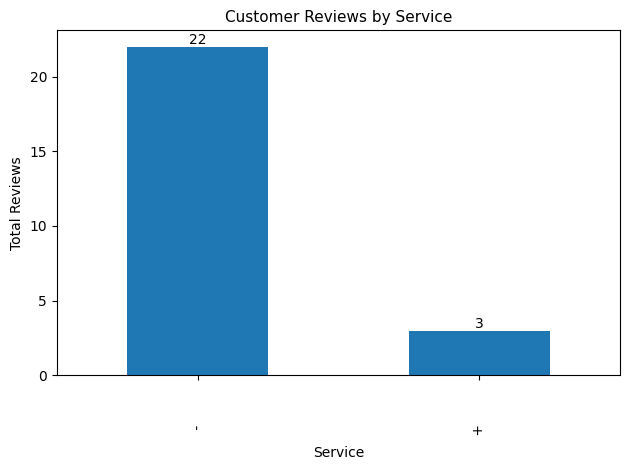

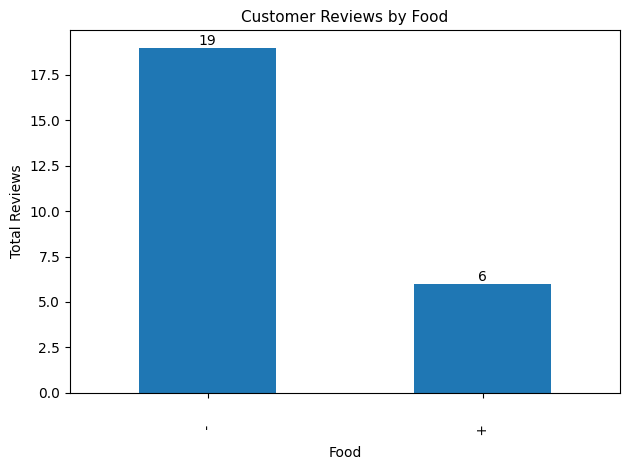

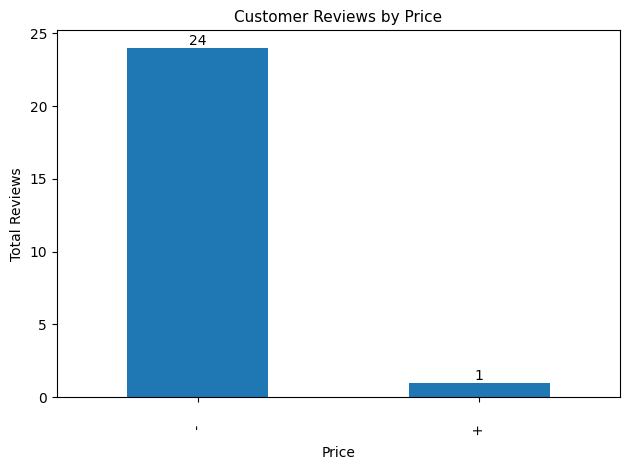

In [62]:
import matplotlib.pyplot as plt
plt.clf()

# hitung frekuensi dari masing-masing nilai pada kolom 'Produk'
bar_service = data_kategori1['Service'].value_counts()
bar_food=data_kategori1['Food'].value_counts()
bar_price=data_kategori1['Price'].value_counts()

plt.figure()
# membuat bar plot dengan method `plot.bar()` dari pandas
ax_service = bar_service.plot.bar()
plt.bar_label(ax_service.containers[0], fontsize=10, color='black')
plt.ylabel('Total Reviews')
plt.title('Customer Reviews by Service', size=11)
plt.tight_layout()
plt.show()

print(' ')


ax_food = bar_food.plot.bar()
plt.bar_label(ax_food.containers[0], fontsize=10, color='black')
plt.ylabel('Total Reviews')
plt.title('Customer Reviews by Food', size=11)
plt.tight_layout()
plt.show()

print(' ')

ax_price = bar_price.plot.bar()
plt.bar_label(ax_price.containers[0], fontsize=10, color='black')
plt.ylabel('Total Reviews')
plt.title('Customer Reviews by Price', size=11)
plt.tight_layout()
plt.show()

SUMMARIZATION DATA MENGGUNAKAN IBM GRANITE DENGAN 25 SAMPEL REVIEW

In [64]:
# Refine the prompt to include reviews
summarization_text = "\n".join([f"Review {i+1}: {review}" for i, review in enumerate(data.head(25)['Review'])])
new_prompt = f"""
  Summarize this restaurant review  in 3 sentences
  {summarization_text}
"""

# Invoke the model with example prompt
response2 = output.invoke(new_prompt)

# Print the response
print("Granite Model Response:\n")
print(response2)

Granite Model Response:

The restaurant review is mixed, with some praising the ambiance, menu selection, and specific dishes like the Cape Cod ravoli, while others criticize the food quality, citing issues such as unappetizing crust, lack of freshness, rubbery potatoes, and even an alleged human hair in the food. Service is also inconsistently rated, with some finding it prompt and others describing it as slow or uncaring. Despite a few positive comments, many reviewers express dissatisfaction, stating they would not return, and some even deem it not worth visiting in Vegas. The pricing is also a point of contention, with some finding it overpriced.
